## Import Libraries

In [101]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()     #Use seaborn style on matplotlib plots
import scipy as sp     #Useful for different stats functions
import statsmodels.api as sm     #Useful stats functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

## Import Dataset

In [81]:
# Import dataset: This dataset comes with sklearn

from sklearn.datasets import load_boston
BostonDataset = load_boston()
df = pd.DataFrame(BostonDataset.data, columns = BostonDataset.feature_names)


# Add the median value of the house 'MEDV' to the dataset

df['MEDV'] = BostonDataset.target
df['LOGMEDV'] = np.log(df['MEDV']+1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LOGMEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3.218876
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,3.117950
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3.575151
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3.538057
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.616309


## Data Cleaning
#### This is a small pre-cleaned dataset

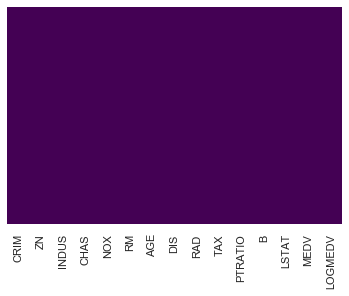

In [82]:
# Check for null values
# This is an easy way to check for null values. This dataset has none. 

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Data Visualisation

Text(0.5, 1.0, 'Log Price Distribution')

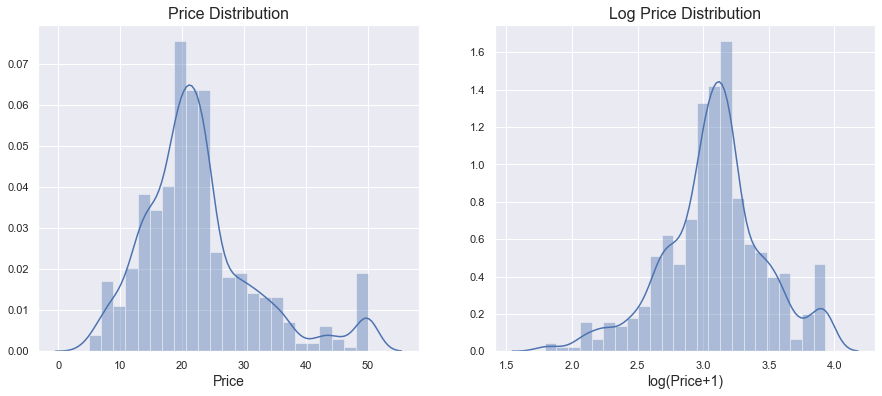

In [83]:
# Plot the distribution of MEDV and log-transformed MEDV. Ideally these would be normally distributed

# Plot price distribution
ax = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['MEDV'])
plt.xlabel('Price', fontsize = 14)
plt.title('Price Distribution', fontsize=16)
# Plot log transformed price distribution
plt.subplot(1,2,2)
sns.distplot(df['LOGMEDV'])
plt.xlabel('log(Price+1)', fontsize = 14)
plt.title('Log Price Distribution', fontsize=16)

#### Log transformed price appears to be slightly more normally distributed. 

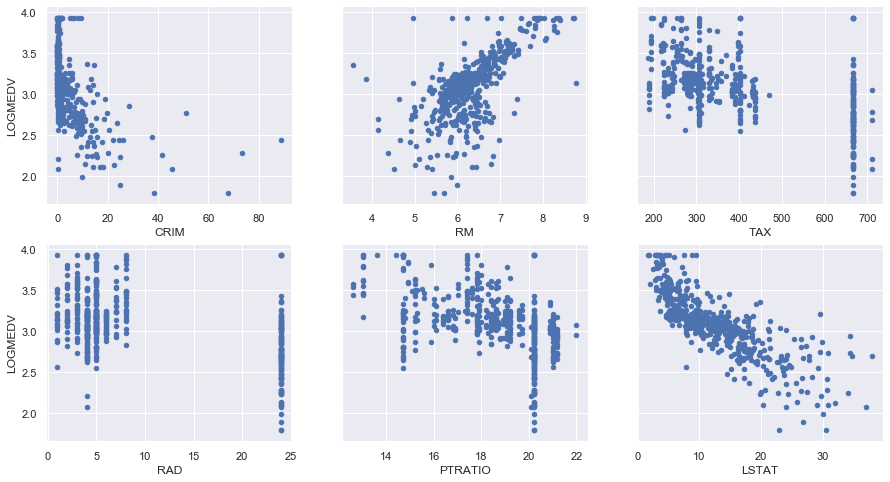

In [84]:
# Figure out if there are any linear relationships between Independent Dependent Variables

fix, axes = plt.subplots(2,3, sharey=True)
df.plot(kind='scatter', x='CRIM', y='LOGMEDV', ax=axes[0][0], figsize=(15,8), c='b')
df.plot(kind='scatter', x='RM', y='LOGMEDV', ax=axes[0][1], c='b')
df.plot(kind='scatter', x='TAX', y='LOGMEDV', ax=axes[0][2], c='b')
df.plot(kind='scatter', x='RAD', y='LOGMEDV', ax=axes[1][0], c='b')
df.plot(kind='scatter', x='PTRATIO', y='LOGMEDV', ax=axes[1][1], c='b')
df.plot(kind='scatter', x='LSTAT', y='LOGMEDV', ax=axes[1][2], c='b')


#### Several features appear to have linear relationships with the price. Multiple regressions is appropriate to use here. 

## Data Modelling

R squared score:  0.760
RMSE score:  0.181


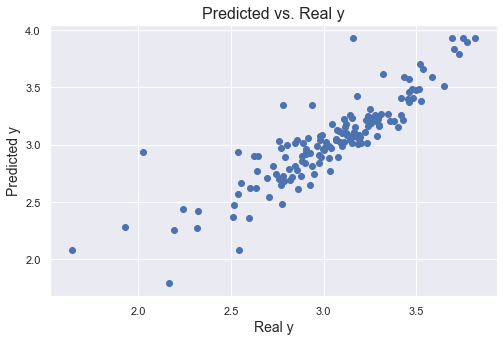

In [129]:
# Define X and y
X = df.drop(['MEDV','LOGMEDV'],axis=1)
y = df['LOGMEDV']

# Split data into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Initialize model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)
plt.figure(figsize=(8,5))
plt.scatter(predictions,y_test)
plt.title('Predicted vs. Real y', fontsize=16)
plt.xlabel('Real y',fontsize=14)
plt.ylabel('Predicted y',fontsize=14)

# Evaluate results
r2 = format(r2_score(y_test, predictions),'.3f')
RMSE = format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f')
print('R squared score: ', r2)
print('RMSE score: ', RMSE)

## Interpreting Results
#### To interpret our results, we first need to check our assumptions

In [109]:
# Get the stats summary of the dataset
X = sm.add_constant(df.drop(['MEDV','LOGMEDV'],axis=1))
y1 = df['MEDV']
lm = sm.OLS(y,X).fit()
#lm = sm.OLS(y1,X).fit()     # Indeed the R squared value is higher with log(MEDV) vs. MEDV
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LOGMEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     142.5
Date:                Fri, 28 Feb 2020   Prob (F-statistic):          2.19e-157
Time:                        15:36:51   Log-Likelihood:                 157.98
No. Observations:                 506   AIC:                            -288.0
Df Residuals:                     492   BIC:                            -228.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0801      0.193     21.125      0.000       3.701       4.460
CRIM          -0.0093      0.001     -7.512      0.000      -0.012      -0.007
ZN             0.0012      0.001      2.224      0.027       0.000       0.002
INDUS          0.0022      0.002      0.957      0.339      -0.002       0.007
CHAS           0.0966      0.033      2.963      0.003       0.033       0.161
NOX           -0.7422      0.145     -5.134      0.000      -1.026      -0.458
RM             0.0902      0.016      5.701      0.000       0.059       0.121
AGE            0.0002      0.000      0.333      0.739      -0.001       0.001
DIS           -0.0476      0.008     -6.302      0.000      -0.062      -0.033
RAD            0.0135      0.003      5.372      0.000       0.009       0.018
TAX           -0.0006      0.000     -4.147      0.000      -0.001      -0.000
PTRATIO       -0.0366      0.005     -7.399      0.000      -0.046      -0.027
B              0.0004      0.000      3.909      0.000       0.000       0.001
LSTAT         -0.0273      0.002    -14.200      0.000      -0.031      -0.023
==============================================================================
Omnibus:                       65.404   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.896
Skew:                           0.553   Prob(JB):                     3.26e-50
Kurtosis:                       6.096   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# Assumption 1: No multicollinearity: The independent variables must not be correlated

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop target columns and columns with high collinearity
X_vif = df.drop(['MEDV','LOGMEDV', 'TAX', 'NOX'],axis=1).assign(const=1)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)

CRIM         1.785343
ZN           2.183394
INDUS        2.872809
CHAS         1.057571
RM           1.904013
AGE          2.875130
DIS          3.641492
RAD          2.533616
PTRATIO      1.598944
B            1.339554
LSTAT        2.927273
const      397.560553
dtype: float64

#### The TAX and NOX columns appeared to be correlated (highly and moderately, respectively), and were dropped from the analysis

Text(0, 0.5, 'Residuals')

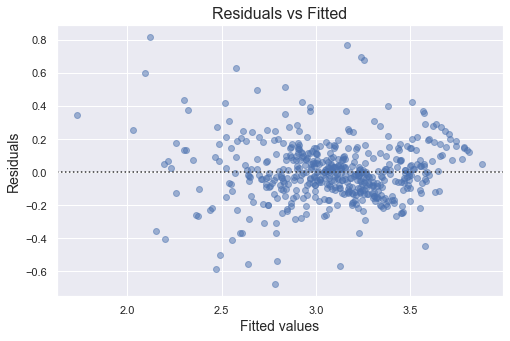

In [142]:
# Assumption 2: No heteroskedestacity: The errors should show constant variance, and not exhibit any kind of growth

# Create residual plot of LOGMEDV vs Residuals
model_fitted_y = lm.fittedvalues      # Fitted values
model_norm_residuals = lm.get_influence().resid_studentized_internal     # Normalized residuals

plt.figure(figsize=(8,5))
sns.residplot(model_fitted_y, 'LOGMEDV', data=df, scatter_kws={'alpha': 0.5})
plt.title('Residuals vs Fitted', fontsize=16)
plt.xlabel('Fitted values',fontsize=14)
plt.ylabel('Residuals',fontsize=14)

#### Residuals vs fitted LOGMEDV does not show any growth, and appears to exhibit constant variance

Text(0, 0.5, 'p(x)')

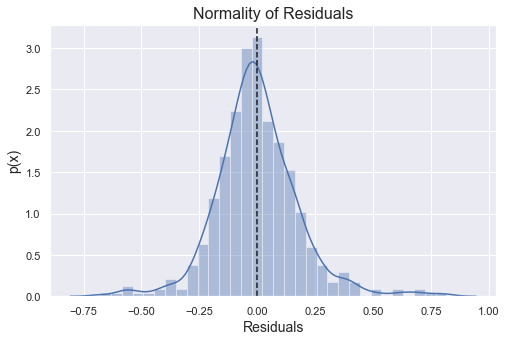

In [149]:
# Assumption 3: Check for normailty of residuals and zero mean error

# One way to check normality is with a distplot
ax = plt.figure(figsize=(8,5))
sns.distplot(df['LOGMEDV'] - model_fitted_y)
plt.axvline((df['LOGMEDV'] - model_fitted_y).mean(),color='k',linestyle='--')
plt.title('Normality of Residuals', fontsize=16)
plt.xlabel('Residuals',fontsize=14)
plt.ylabel('p(x)',fontsize=14)

#### Residuals are normally distributed and have a zero mean

#### Assumptions are satisfied. Now to look at the coefficients

In [152]:
cf = pd.DataFrame(lr.coef_,X.columns,columns=['Coeffs'])
cf['Exp coeff'] = np.exp(cf['Coeffs'])
cf

,Coeffs,Exp coeff
CRIM,-0.009956,0.990093
ZN,0.000919,1.000920
INDUS,0.002809,1.002813
CHAS,0.097416,1.102319
NOX,-0.618874,0.538551
RM,0.097033,1.101896
AGE,-0.000243,0.999757
DIS,-0.044296,0.956671
RAD,0.010284,1.010337
TAX,-0.000427,0.999573
